### Part (b) - ANOVA and PCA

UE23CS342AA2 - Data Analytics

* There are 7 questions in this worksheet.
* Nitheesh Pugazhanthi - nith.pugazhanthi@gmail.com



Name: Rithvik Rajesh Matta

SRN: pes2ug23cs485

Sec: H

### About the Dataset

* You are a Computational Biologist, and your task is to derive various conclusions on the effects of the new drug discovered to treat cancer patients.
* Each row denotes a patient , which is indexed using their Patient ID.
* From each patient expressions of 15 important genes have been recorded.(Gene_1 to Gene_15)
* The Drug_take column is binary , where 0 indicates  the patient has not taken this new drug and 1 if he/she has taken the drug.
* The Metabolism_Rate column indicates the rate of metabolism of the patient .(0:slow , 1: Normal , 2: fast)
* The Survival_Outcome column is the dependent variable. It indicates how long has the patient survived after diagnosis.

In [2]:
if (!requireNamespace("tidyverse", quietly = TRUE)) {
    install.packages("tidyverse")
}
if (!requireNamespace("moments", quietly = TRUE)) {
    install.packages("moments") 
}
if (!requireNamespace("readr", quietly = TRUE)) { 
    install.packages("readr")
}

In [3]:
library(tidyverse)
library(moments) 
library(ggplot2)
library(readr)
library(dplyr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


### Section 1 : Anova

* Analysis of Variance (ANOVA) is a hypothesis testing procedure used for comparing means from several groups simultaneously.
* Using an one-way ANOVA, we test whether the mean values of an outcome variable for different levels of a factor are different.
* There are 3 main assumptions which the data must satisfy before proceeding with ANOVA.


*Problem 1*

Do the Metabolism_Rate and the Survival_Outcome columns follow normality assumption required for ANOVA? Verify for each group under the Metabolism Rate using the Q-Q plots. (1 point)

Note : As a bonus (not evaluated), do have a look at shapiro-wilk test from [here](https://www.geeksforgeeks.org/machine-learning/how-to-perform-a-shapiro-wilk-test-in-python/) to statistically infer normality!

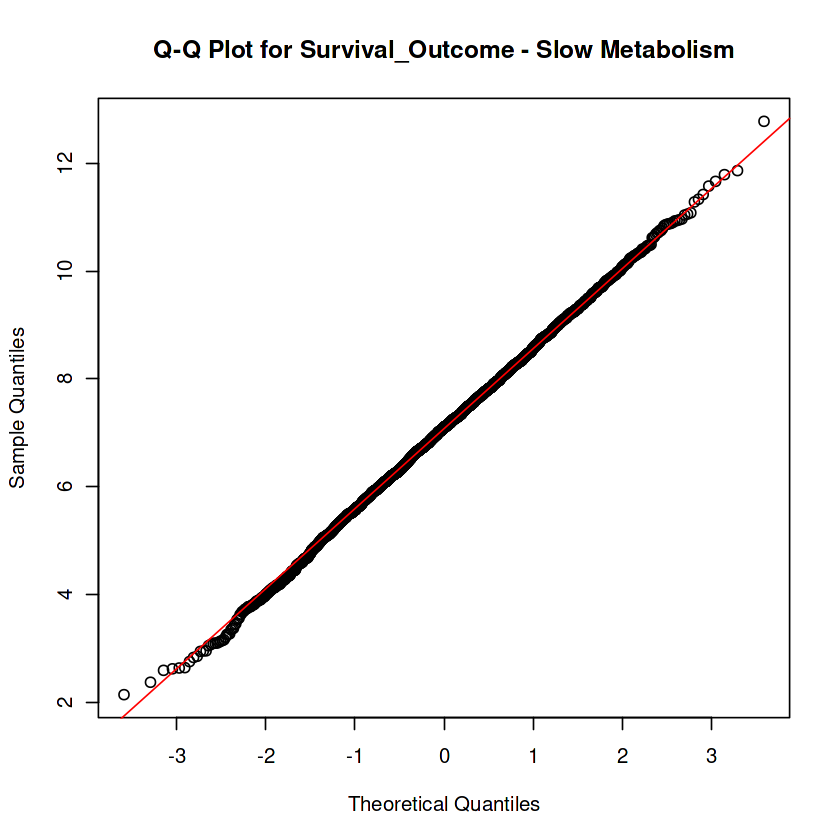

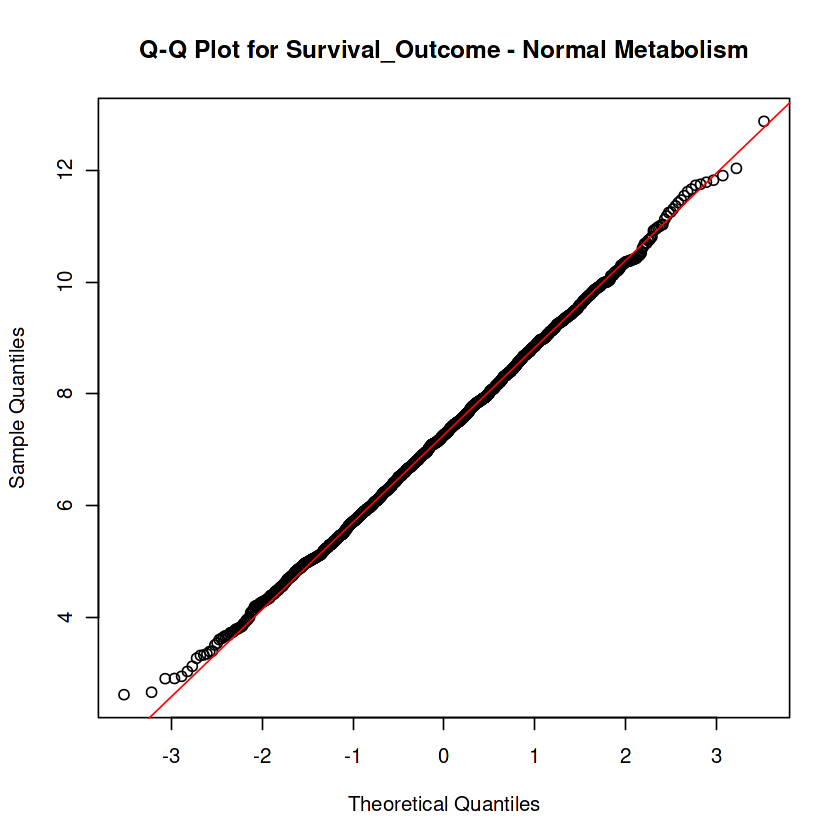

Slow Metabolism: W = 0.9996 , p-value = 0.8001 
→ Data is approximately normal.

Normal Metabolism: W = 0.9993 , p-value = 0.5498 
→ Data is approximately normal.

Fast Metabolism: W = 0.9996 , p-value = 0.9075 
→ Data is approximately normal.



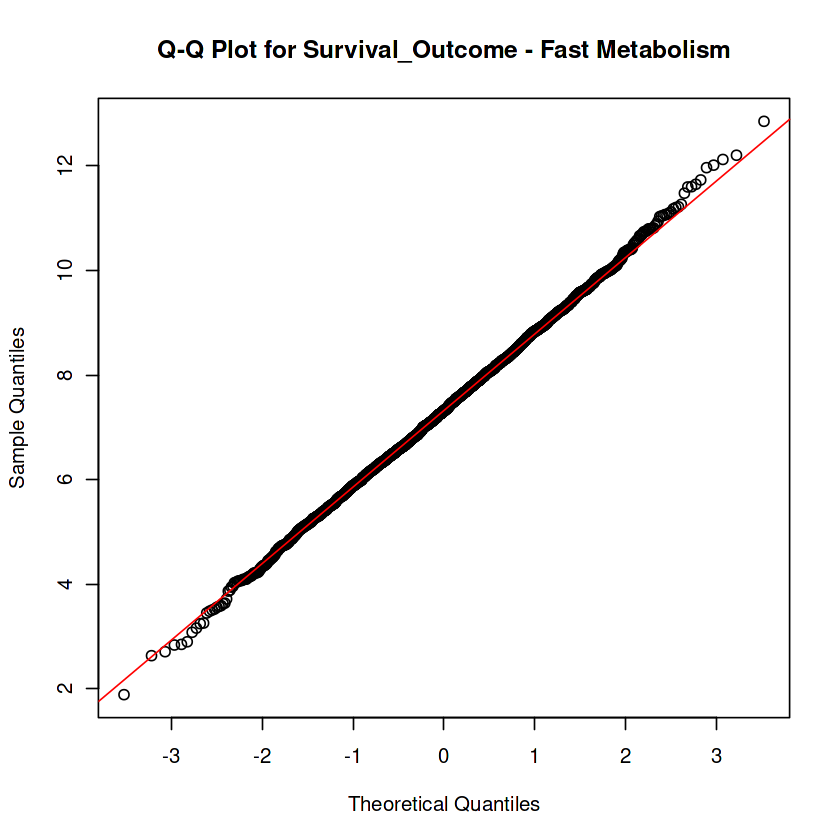

In [4]:

dataset <- read.csv("/kaggle/input/worksheet-1-anova-pca/ws_1_cancer_genes.csv")

groups <- c(0, 1, 2)
group_names <- c("Slow", "Normal", "Fast")

for (i in 1:length(groups)) {
  data <- dataset$Survival_Outcome[dataset$Metabolism_Rate == groups[i]]
  qqnorm(data, main = paste("Q-Q Plot for Survival_Outcome -", group_names[i], "Metabolism"))
  qqline(data, col = "red")
}

for (i in 1:length(groups)) {
  data <- dataset$Survival_Outcome[dataset$Metabolism_Rate == groups[i]]
  test <- shapiro.test(data)
  cat(paste(group_names[i], "Metabolism: W =", round(test$statistic, 4),
            ", p-value =", round(test$p.value, 4), "\n"))
  if (test$p.value > 0.05) {
    cat("→ Data is approximately normal.\n\n")
  } else {
    cat("→ Data is NOT normal.\n\n")
  }
}


*Problem 2*

Now you need to determine if the metabolism rate has any effect on the patient's survival. How can this be inferred using statistical methods? Name the method and then derive your inference using the same method. Can one use t-test for the same? Why? or Why not ?  (before proceeding do check for heteroscedasticity using levene's test !) (2+1 points)

*NOTE*: Assume the significance level to be 0.05

In [5]:
suppressPackageStartupMessages(library(car))

# Levene's Test
levene_result <- leveneTest(Survival_Outcome ~ as.factor(Metabolism_Rate), data = dataset)

cat("===== Levene's Test for Homogeneity of Variances =====\n")
levene_table <- data.frame(
  Source = rownames(levene_result),
  Df = levene_result$Df,
  F_value = round(levene_result$`F value`, 4),
  p_value = round(levene_result$`Pr(>F)`, 5)
)
print(levene_table)
cat("\n")

# One-way ANOVA
anova_result <- aov(Survival_Outcome ~ as.factor(Metabolism_Rate), data = dataset)
anova_summary <- summary(anova_result)[[1]]

cat("===== One-way ANOVA =====\n")
anova_table <- data.frame(
  Source = rownames(anova_summary),
  Df = anova_summary$Df,
  Sum_Sq = round(anova_summary$`Sum Sq`,2),
  Mean_Sq = round(anova_summary$`Mean Sq`,2),
  F_value = round(anova_summary$`F value`,2),
  p_value = signif(anova_summary$`Pr(>F)`,5)
)
print(anova_table)
cat("\n")

# Inference
p_value <- anova_summary$`Pr(>F)`[1]
if(p_value < 0.05){
  cat("Inference: p-value =", signif(p_value,5), "→ Reject H0. Metabolism_Rate has a significant effect on Survival_Outcome.\n")
}else{
  cat("Inference: p-value =", signif(p_value,5), "→ Fail to reject H0. Metabolism_Rate does NOT have a significant effect on Survival_Outcome.\n")
}

cat("\nNote: t-test cannot be used because Metabolism_Rate has more than two groups. ANOVA is required for comparing means across multiple groups.\n")


===== Levene's Test for Homogeneity of Variances =====
  Source   Df F_value p_value
1  group    2  2.3289 0.09747
2        7640      NA      NA

===== One-way ANOVA =====
                      Source   Df   Sum_Sq Mean_Sq F_value    p_value
1 as.factor(Metabolism_Rate)    2   106.07   53.04   23.18 9.2137e-11
2 Residuals                  7640 17481.74    2.29      NA         NA

Inference: p-value = 9.2137e-11 → Reject H0. Metabolism_Rate has a significant effect on Survival_Outcome.

Note: t-test cannot be used because Metabolism_Rate has more than two groups. ANOVA is required for comparing means across multiple groups.


Post Hoc Tests

* When you use ANOVA to test the equality of at least three group means, statistically significant results indicate that not all of the group means are equal. However, ANOVA results do not identify which particular differences between pairs of means are significant.

* To identify which particular group's means differ from each other , we use Post Hoc Tests.

* The most common method is Tukey's method.

* If the adjusted p-value between a pair of groups is less than 0.05, then we can assume statistical significance between the pair. (difference !)

* You can learn more about this [here](https://statisticsbyjim.com/anova/post-hoc-tests-anova/)

* NOTE: If p-value is 0.000 then it means that the value too small to be printed out and must be considered as <0.05

*Problem 3*

Perform Tukey's Test to infer which pairs have means statistically significant from one other and which don't. Which pair of categories show a clear difference in the patient's survival ? (1 point)

In [6]:

tukey_result <- TukeyHSD(anova_result)


tukey_df <- as.data.frame(tukey_result$`as.factor(Metabolism_Rate)`)
tukey_df$Comparison <- rownames(tukey_df)


colnames(tukey_df) <- c("diff", "lwr", "upr", "p_adj", "Comparison")


tukey_df <- tukey_df[, c("Comparison", "diff", "lwr", "upr", "p_adj")]


print(tukey_df)


cat("\nSignificant differences (p_adj < 0.05):\n")
significant_pairs <- tukey_df[tukey_df$p_adj < 0.05, ]
print(significant_pairs)


    Comparison       diff         lwr       upr        p_adj
1-0        1-0 0.20494356  0.10674008 0.3031470 3.043494e-06
2-0        2-0 0.26640841  0.16862594 0.3641909 5.547299e-10
2-1        2-1 0.06146485 -0.04288722 0.1658169 3.510579e-01

Significant differences (p_adj < 0.05):
    Comparison      diff       lwr       upr        p_adj
1-0        1-0 0.2049436 0.1067401 0.3031470 3.043494e-06
2-0        2-0 0.2664084 0.1686259 0.3641909 5.547299e-10


### Two Way ANOVA

* Two-way ANOVA is used when the response variable is influenced by several factors.
* Now along with metabolism we want to consider the factor whether the patient has taken this new drug or not.
* Two-way ANOVA tests for 3 conclusions :
    * If the metabolism rate affects the patient's survival ?
    * If the drug has any effect on the patient's survival ?
    * If the interaction between the two independent variables (metabolism rate and drug intake) affects the patient's survival ?


*Problem 4*

Does the interaction between the different metabolism rates and drug intake significantly affect the patient's survival ? Justify your answer.
Based on this study , would recommend this drug based on the patient's metabolism ? 
What would you name this new drug 👀 ? (2 points)

                                                  Df Sum Sq Mean Sq F value
as.factor(Metabolism_Rate)                         2    106   53.04  23.204
as.factor(Drug_take)                               1     26   25.54  11.174
as.factor(Metabolism_Rate):as.factor(Drug_take)    2      1    0.46   0.203
Residuals                                       7637  17455    2.29        
                                                  Pr(>F)    
as.factor(Metabolism_Rate)                      8.98e-11 ***
as.factor(Drug_take)                            0.000833 ***
as.factor(Metabolism_Rate):as.factor(Drug_take) 0.816446    
Residuals                                                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Interaction p-value = 0.8164458 
Inference: Interaction between Metabolism_Rate and Drug_take is not significant. The drug effect is independent of metabolism.


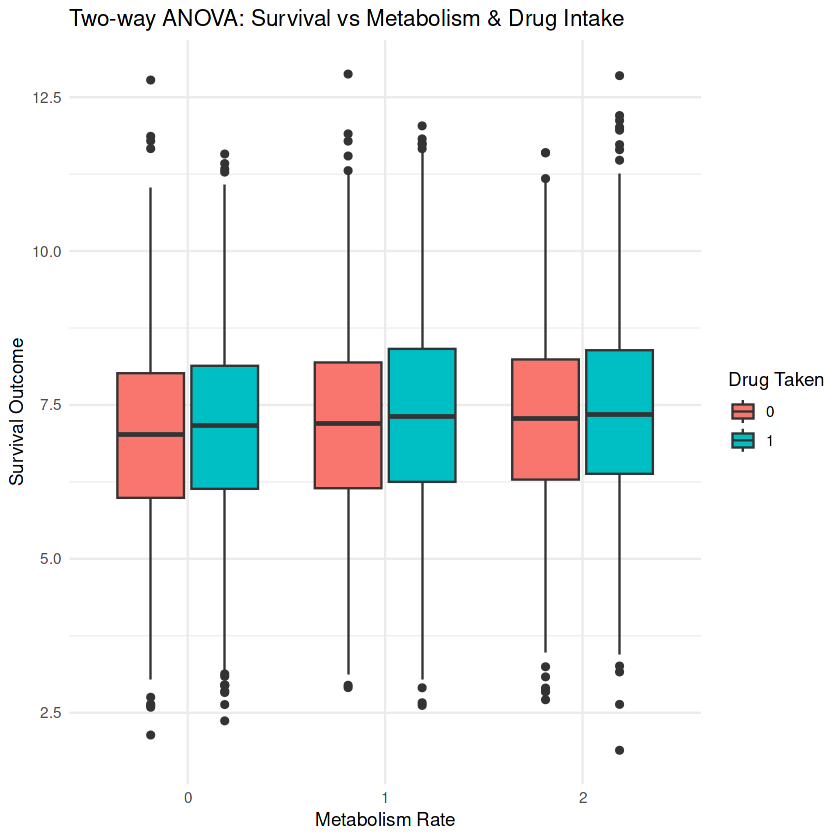

In [7]:
library(ggplot2)

two_way_anova <- aov(Survival_Outcome ~ as.factor(Metabolism_Rate) * as.factor(Drug_take), data = dataset)
anova_summary <- summary(two_way_anova)
print(anova_summary)

interaction_p <- anova_summary[[1]]["as.factor(Metabolism_Rate):as.factor(Drug_take)","Pr(>F)"]
cat("\nInteraction p-value =", interaction_p, "\n")

if(interaction_p < 0.05){
  cat("Inference: Interaction between Metabolism_Rate and Drug_take is significant. The effect of the drug depends on the patient's metabolism.\n")
}else{
  cat("Inference: Interaction between Metabolism_Rate and Drug_take is not significant. The drug effect is independent of metabolism.\n")
}

ggplot(dataset, aes(x = as.factor(Metabolism_Rate), y = Survival_Outcome, fill = as.factor(Drug_take))) +
  geom_boxplot() +
  labs(x = "Metabolism Rate", y = "Survival Outcome", fill = "Drug Taken") +
  ggtitle("Two-way ANOVA: Survival vs Metabolism & Drug Intake") +
  theme_minimal()


Justification

1. Statistical Justification:

The Two-way ANOVA test indicates that the interaction term between Metabolism_Rate and Drug_take has a p-value of 0.816 (> 0.05).

Since the p-value is greater than 0.05, we fail to reject the null hypothesis for interaction.

This implies that there is no significant interaction effect: the impact of taking the drug on patient survival does not depend on metabolism type.

2. Visual Justification (Boxplot):

The boxplot supports the statistical result:

For each Metabolism_Rate, the survival difference between the drug and no-drug groups remains consistent.

The absence of crossing patterns or irregular changes indicates a lack of interaction effect.

✅ Conclusion: Both the statistical test and the visualization consistently suggest that there is no interaction effect between Metabolism_Rate and Drug_take on survival.

Since the drug shows a significant positive effect on survival across all metabolism types, it can be recommended regardless of the patient’s metabolism.

The drug is hereby proposed to be named Lifevia.

## Principal Component Analysis

*Problem 5*

* Explain Dimensionality Reduction and how does it impact the curse of dimensionality ?(think in terms of data sparsity) Perform PCA on the Columns of the gene expression(Gene_1 to Gene_15). Extract how much variance does each principal component explain. How many components should we retain based on the scree plot.(1+1+1 points)

* Examine the loadings of the first two principal components. Which variables contribute most to these components? (1 point)

* Hint 1: Scree Plot is a common method for determining the number of PCs to be retained through a graphical representation. A Scree Plot is a simple line segment plot that shows the eigenvalues for each individual PC.

* Hint 2: In PCA, the contribution of each feature to a principal component is called the loading. Loadings are compared with the absolute value


Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.3752 2.0000 1.7794 0.91512 0.56616 0.41582 0.39179
Proportion of Variance 0.3761 0.2667 0.2111 0.05583 0.02137 0.01153 0.01023
Cumulative Proportion  0.3761 0.6428 0.8538 0.90966 0.93103 0.94256 0.95279
                           PC8     PC9   PC10    PC11    PC12    PC13    PC14
Standard deviation     0.38064 0.34874 0.3264 0.29776 0.27982 0.26026 0.22822
Proportion of Variance 0.00966 0.00811 0.0071 0.00591 0.00522 0.00452 0.00347
Cumulative Proportion  0.96245 0.97056 0.9777 0.98357 0.98879 0.99331 0.99678
                          PC15
Standard deviation     0.21972
Proportion of Variance 0.00322
Cumulative Proportion  1.00000

PC1     PC2     PC3     PC4     PC5     PC6     PC7     PC8     PC9    PC10 
0.37609 0.26666 0.21108 0.05583 0.02137 0.01153 0.01023 0.00966 0.00811 0.00710 
   PC11    PC12    PC13    PC14    PC15 
0.00591 0.00522 0.00452 0.00347 0.00322

PC1     PC2     PC3     PC4     PC5     PC6     PC7     PC8     PC9    PC10 
0.37609 0.64276 0.85383 0.90966 0.93103 0.94256 0.95279 0.96245 0.97056 0.97766 
   PC11    PC12    PC13    PC14    PC15 
0.98357 0.98879 0.99331 0.99678 1.00000

,PC1,PC2
Gene_1,0.359441039,0.07728767
Gene_2,0.061401226,-0.39681709
Gene_3,0.002940794,0.17975432
Gene_4,0.209836001,0.37062382
Gene_5,-0.281746013,0.14996988
Gene_6,0.092484674,-0.46869794
Gene_7,-0.289028087,-0.09841338
Gene_8,-0.292444174,-0.12796568
Gene_9,0.317550390,-0.12045176
Gene_10,-0.358493212,0.20790410


[1] "Gene_1"  "Gene_10" "Gene_13"

[1] "Gene_6"  "Gene_14" "Gene_2"

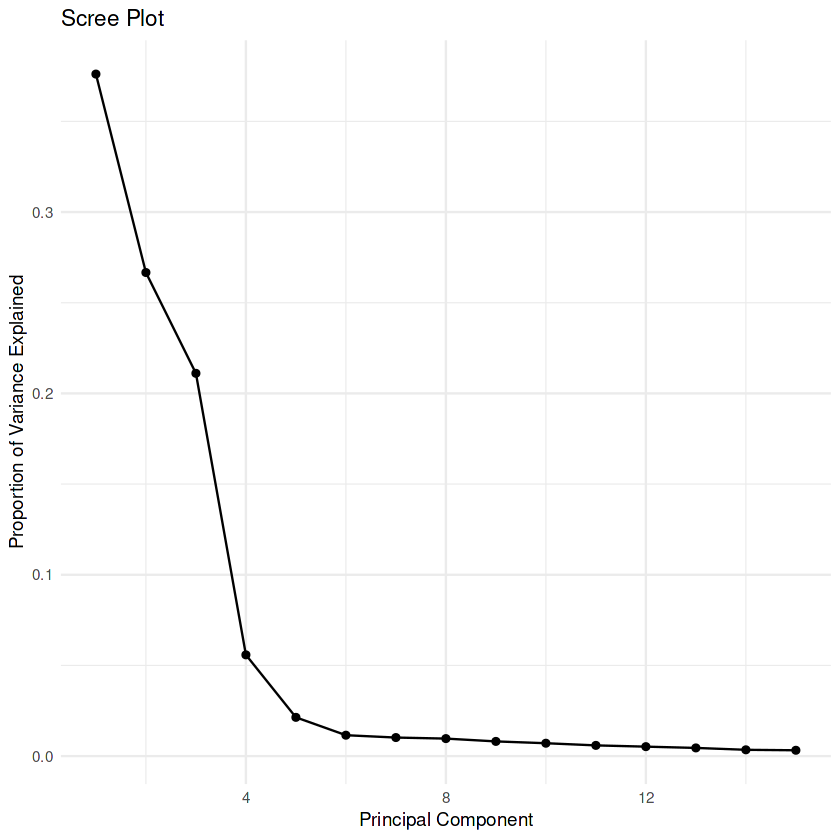

In [8]:
gene_data         <- dataset[, paste0("Gene_", 1:15)]
gene_scaled       <- scale(gene_data)
pca_result        <- prcomp(gene_scaled, center = TRUE, scale. = TRUE)
pca_summary       <- summary(pca_result)
pca_summary

variance_explained <- pca_summary$importance[2, ]
cumulative_variance <- pca_summary$importance[3, ]
variance_explained
cumulative_variance

library(ggplot2)
eig_values <- (pca_result$sdev)^2
pve        <- eig_values / sum(eig_values)
scree_df   <- data.frame(PC = 1:length(pve), Variance_Explained = pve)

ggplot(scree_df, aes(x = PC, y = Variance_Explained)) +
  geom_line() + 
  geom_point() +
  labs(title = "Scree Plot", x = "Principal Component", y = "Proportion of Variance Explained") +
  theme_minimal()

loadings       <- pca_result$rotation[, 1:2]
loadings
abs_loadings   <- abs(loadings)
PC1_top_vars   <- names(sort(abs_loadings[, 1], decreasing = TRUE))[1:3]
PC2_top_vars   <- names(sort(abs_loadings[, 2], decreasing = TRUE))[1:3]

PC1_top_vars
PC2_top_vars


Dimensionality Reduction with PCA

Dimensionality reduction is the process of reducing the number of features while retaining most of the important information. This helps mitigate the curse of dimensionality by reducing data sparsity and improving model performance.

In this dataset, PCA (Principal Component Analysis) was applied to the 15 gene expression columns (Gene_1 to Gene_15).

The first three principal components (PCs) explain approximately 85% of the total variance:

PC1: 37.6%

PC2: 26.7%

PC3: 21.1%

Based on the scree plot, retaining these three components is appropriate.

Loadings analysis:

PC1 is mainly influenced by Gene_1, Gene_10, and Gene_13.

PC2 is mainly influenced by Gene_6, Gene_14, and Gene_2.

➡️ These genes are the most influential in capturing the variance structure of the dataset.

*Problem 6*

Now for the first and the second Principal Component , find the percentage contribution of each feature to the Principal component.(2 points)

Hint: First find the square of the loadings also known as cos2 values. Find the percentage contribution using these values.

In [9]:
loadings <- pca_result$rotation[, 1:2]
cos2 <- loadings^2
pc1_contrib <- cos2[,1] / sum(cos2[,1]) * 100
pc2_contrib <- cos2[,2] / sum(cos2[,2]) * 100

contrib_df <- data.frame(
  Gene = rownames(loadings),
  PC1_Percent_Contribution = pc1_contrib,
  PC2_Percent_Contribution = pc2_contrib
)

contrib_df


,Gene,PC1_Percent_Contribution,PC2_Percent_Contribution
,<chr>,<dbl>,<dbl>
Gene_1,Gene_1,1.291979e+01,0.5973384
Gene_2,Gene_2,3.770111e-01,15.7463801
Gene_3,Gene_3,8.648267e-04,3.2311617
Gene_4,Gene_4,4.403115e+00,13.7362018
Gene_5,Gene_5,7.938082e+00,2.2490966
Gene_6,Gene_6,8.553415e-01,21.9677756
Gene_7,Gene_7,8.353724e+00,0.9685193
Gene_8,Gene_8,8.552359e+00,1.6375216
Gene_9,Gene_9,1.008383e+01,1.4508628


*Problem 7*

Create a circle variable plot using the first two principal components. This Plot helps us visualize which variables are best represented by the principal components. (1 point)

You can use the fviz_pca_var function from the factoextra library for this.

NOTE: Higher the Cos2 value , longer the arrow of the feature.



Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



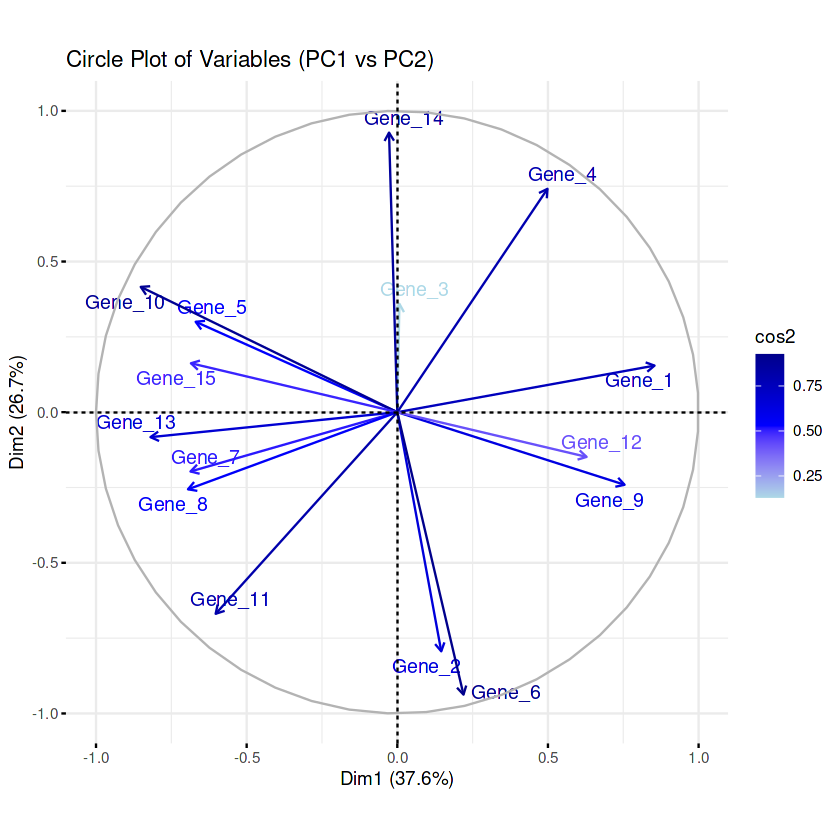

In [10]:
library(factoextra)

gene_data <- dataset[, paste0("Gene_", 1:15)]
gene_scaled <- scale(gene_data)
pca_result <- prcomp(gene_scaled, center = TRUE, scale. = TRUE)

fviz_pca_var(pca_result,
             col.var = "cos2",
             gradient.cols = c("lightblue", "blue", "darkblue"),
             repel = TRUE,
             axes = c(1,2),
             title = "Circle Plot of Variables (PC1 vs PC2)")


By picking the principal components that retain/express most variance we are able to preserve the patterns of the original dataset , all the while reducing the dataset's size , thus reducing the training time for regressions and classifiers.

*fin*